In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image,ImageChops
import glob


In [2]:
data_dir = '../../../Images/BottleStoodUp_atNight/Positive'      #This is for the home laptop
# data_dir = '../../../../BottleStoodUp_atNight/Positive/'        #For the work laptop

Here, there is an important thing to notice:

- By default, ImageFolder() function loads images with 3 channels, hence for loading the images of the bottle, that are grayscale, we need to add another transform, the Grayscale() transform.


In [3]:
transform_characteristics = transforms.Compose([transforms.Grayscale(),
                                                transforms.ToTensor(),
                                                transforms.Resize(255),
                                                transforms.CenterCrop(224)])
dataset = datasets.ImageFolder(data_dir, transform=transform_characteristics)   # By default the imageFolder loads images with 3 channels 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [4]:
X = dataset[0]
image_in_tensor = X[0]
print(image_in_tensor.shape)
print(type(image_in_tensor))

torch.Size([1, 224, 224])
<class 'torch.Tensor'>


c:\Users\alexj\.conda\envs\tfm_2\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


See the effect of NOT including the Grayscale() transform.

In [5]:
transform_characteristics = transforms.Compose([transforms.ToTensor(),
                                                transforms.Resize(255),
                                                transforms.CenterCrop(224)])
dataset = datasets.ImageFolder(data_dir, transform=transform_characteristics)   # By default the imageFolder loads images with 3 channels 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [6]:
X = dataset[0]
image_in_tensor = X[0]
print(image_in_tensor.shape)
print(type(image_in_tensor))

torch.Size([3, 224, 224])
<class 'torch.Tensor'>


Anyway, we will leave this as per default, loading images in three channels. 

Now, we will try the data loader. We will see the shape of one single image of one batch of the ones that are formed in the data loader.

In [9]:
images, labels = next(iter(dataloader))
print("The images are stored in a variable of type: ", type(images))
single_img = images[0]
print("One single image of the first batch of the data loader is of shape: ", single_img.shape)

The images are stored in a variable of type:  <class 'torch.Tensor'>
One single image of the first batch of the data loader is of shape:  torch.Size([3, 224, 224])


Above, we can see that the shape of a single image. It contains the 3 channels that we obtained at the moment of building the dataset. Trying to display this image will require some changes as this variable is still of torch type.

This is the original image


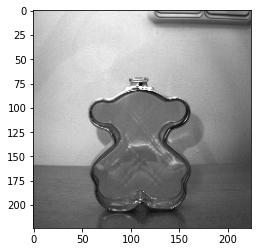

In [11]:
single_img_permuted = single_img.permute(1, 2, 0) 
single_img_numpy = single_img_permuted.detach().numpy()
print("This is the original image")
plt.imshow(single_img_numpy)